In [1]:
import cv2
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import os.path as osp
import os
import xml.etree.ElementTree as ET
import imutils

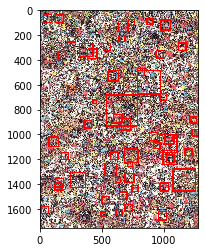

In [2]:
# select and read a JPEGImage
file_num = 2
img = imread('datasets/JPEGImages/0' + ('0' + str(file_num) if file_num < 10 else str(file_num)) + '.jpg')
img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# load cascade
waldo_cascade = cv2.CascadeClassifier('cascade_waldo/classifier/cascade.xml')

# run detection
# The 2nd parameter is scaleFactor, which is how much the image is scaled in every step. The smaller the more robust.
#     For example, scaleFactor=1.03 means reduce by 3% each level.
# The 3rd parameter is minNeighbors. 
#     The higher the more precise, but we need to keep this low to make it include a true positive in most images
waldo_candidates = waldo_cascade.detectMultiScale(img_grey, 1.03, 3)
for (x,y,w,h) in waldo_candidates:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
    roi_gray = img_grey[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

plt.imshow(img)
plt.imsave('dump.jpg', img)